In [8]:
import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [240]:
df = pd.read_csv("/Users/lisajin/Documents/Smnology/overall_quan.csv",encoding = "ISO-8859-1")
headers = np.array(df.columns)  # get headers
values = df.values  # numpy array of values
matrix = np.concatenate([[headers], values])  # append to the final matrix


data=pd.DataFrame(df).to_numpy()
df = df.iloc[1: , :]

In [241]:
df.head()

,StartDate,EndDate,relationship_status,relationship_length,sleep_separate,first_time_separate,sleep_sparate_staytogethergoodness,sleep_separate_goodness,sexuallifeimprove_separatebeds,occupation,employment,Gender,Age,Household Income,Education,Location (Census Region),sleep_score,income_median,sleep_score_cat
1,7/10/14 18:37,7/10/14 18:39,"Single, but cohabiting with a significant other",1-5 years,Once a year or less,Within the first 1-5 years of our relationship,0,7,0,Other (please specify),student,Male,18-29,"<=24,999",Some college or Associate degree,Pacific,3.5,12499.5,2.0
2,7/10/14 15:54,7/10/14 15:56,"Single, but cohabiting with a significant other",1-5 years,A few times per month,Immediately/ We've always slept in separate beds,7,10,0,Healthcare Support Occupations,employed,Male,18-29,NaN,Bachelor degree,South Atlantic,6.75,NaN,2.0
3,7/10/14 15:44,7/10/14 15:49,Married,1-5 years,Never,NaN,NaN,NaN,NaN,Legal Occupations,employed,Male,18-29,">150,000",Graduate degree,South Atlantic,NaN,225000.0,NaN
4,7/10/14 13:47,7/10/14 13:47,Married,1-5 years,Never,NaN,NaN,NaN,NaN,"Life, Physical, and Social Science Occupations",employed,Male,18-29,"25,000_49,999",Bachelor degree,Middle Atlantic,NaN,37499.5,NaN
5,7/10/14 13:13,7/10/14 13:14,Married,1-5 years,Never,NaN,NaN,NaN,NaN,Office and Administrative Support Occupations,employed,Male,18-29,"100,000_149,999",Graduate degree,South Atlantic,NaN,124999.5,NaN


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 1 to 1093
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StartDate                           1093 non-null   object 
 1   EndDate                             1093 non-null   object 
 2   relationship_status                 1093 non-null   object 
 3   relationship_length                 1079 non-null   object 
 4   sleep_separate                      1079 non-null   object 
 5   first_time_separate                 482 non-null    object 
 6   sleep_sparate_staytogethergoodness  481 non-null    object 
 7   sleep_separate_goodness             481 non-null    object 
 8   sexuallifeimprove_separatebeds      481 non-null    object 
 9   occupation                          1064 non-null   object 
 10  employment                          1064 non-null   object 
 11  Gender                              1005 no

<AxesSubplot:>

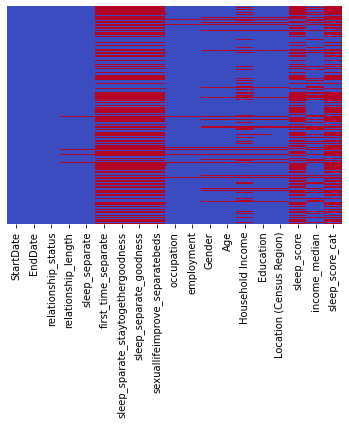

In [243]:
#check the null part in the whole data set, red part is missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [244]:
import time
import datetime

df['StartDate'] = pd.to_datetime(df['StartDate'])
df['EndDate'] = pd.to_datetime(df['EndDate'])

In [245]:
df=df.dropna()

In [246]:
df['relationship_status'].str.find('In a domestic partnership or civil union').count()

376

In [247]:
#marital pie chart set up
len_civ=len(df[df['relationship_status'] == "In a domestic partnership or civil union"])
len_mar=len(df[df['relationship_status'] == "Married"])
len_sin=len(df[df['relationship_status'] == "Single, but cohabiting with a significant other"])
len_wid=len(df[df['relationship_status'] == "Widowed"])
len_div=len(df[df['relationship_status'] == "Divorced"])
len_sep=len(df[df['relationship_status'] == "Separated"])


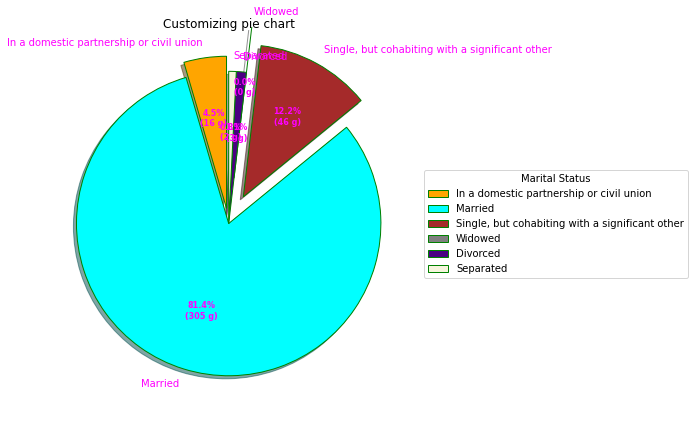

In [248]:
# Creating dataset
marital_status = ['In a domestic partnership or civil union', 'Married', 'Single, but cohabiting with a significant other',
        'Widowed', 'Divorced', 'Separated']
  
data = [len_civ, len_mar, len_sin, len_wid, len_div, len_sep]
  
# Creating plot
# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)
  
# Creating color parameters
colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "beige")
  
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = marital_status,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))

# Adding legend
ax.legend(wedges,marital_status ,
          title ="Marital Status",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customizing pie chart")
  
# show plot
plt.show()

In [249]:
#income pie chart set up
len_t1=len(df[df['Household Income'] == "0− 24,999"])
len_t2=len(df[df['Household Income'] == "25,000_49,999"])
len_t3=len(df[df['Household Income'] == "50,000_99,999"])
len_t4=len(df[df['Household Income'] == "100,000_149,999"])
len_t5=len(df[df['Household Income'] == ">150,000"])
print(len_t1)


0


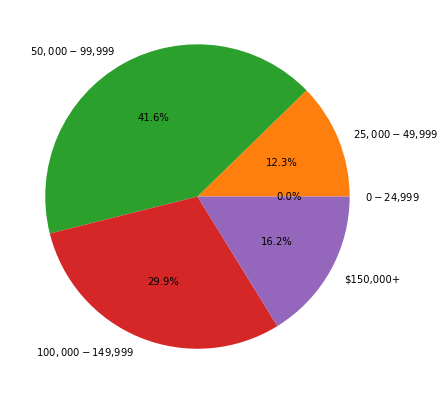

In [250]:
# Creating dataset
income = ['$0-$24,999', '$25,000-$49,999', '$50,000-$99,999',
        '$100,000-$149,999', '$150,000+']
  
data = [len_t1,len_t2, len_t3, len_t4,len_t5]




# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = income,autopct='%1.1f%%')
  
# show plot
plt.show()

<AxesSubplot:xlabel='sleep_score', ylabel='Count'>

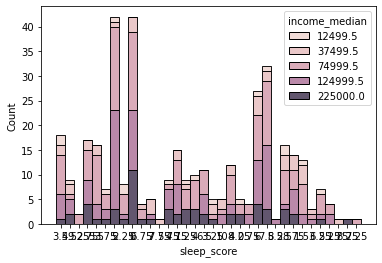

In [234]:
sns.histplot(data=df, x="sleep_score",hue='income_median',
             multiple='stack',
             bins=10)

<AxesSubplot:xlabel='sleep_score', ylabel='income_median'>

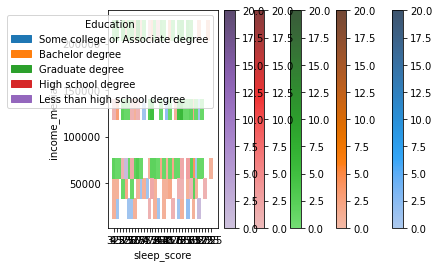

In [238]:
sns.histplot(data=df, x="sleep_score",y='income_median',
             hue='Education',
             cbar=True,
             bins=10)

<AxesSubplot:xlabel='sleep_score_cat', ylabel='Count'>

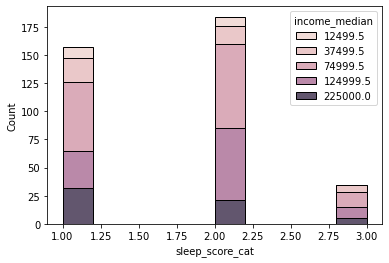

In [309]:
#sleep_score_cat is the category to see the sleep quality better in three groups
#0-3.5 group 1, 3.5-7.9 group 2; 8-10 group 3
sns.histplot(data=df, x="sleep_score_cat",hue='income_median',
             multiple='stack',
             bins=10)

<AxesSubplot:xlabel='sleep_score_cat', ylabel='income_median'>

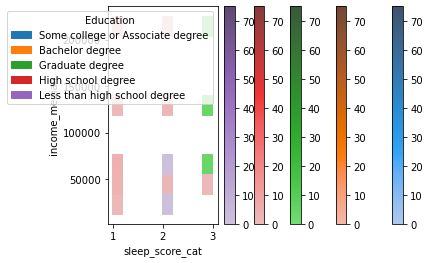

In [254]:
sns.histplot(data=df, x="sleep_score_cat",y='income_median',
             hue='Education',
             cbar=True,
             bins=10)

In [259]:
df['sleep_score_cat3']=df.sleep_score_cat>=2

<AxesSubplot:xlabel='sexuallifeimprove_separatebeds', ylabel='income_median'>

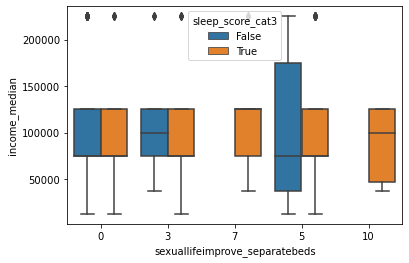

In [262]:
sns.boxplot(x='sexuallifeimprove_separatebeds',y='income_median',hue='sleep_score_cat3',data=df)

In [313]:
income_per_gender = (
    df
    .groupby(['Household Income', 'Gender'])
    .occupation
    .nunique()
    .unstack()
)

In [314]:
income_per_gender.head()

Gender,Female,Male
Household Income,,
"100,000_149,999",13,14
"25,000_49,999",13,13
"50,000_99,999",15,16
"<=24,999",5,4
">150,000",9,12


<AxesSubplot:xlabel='Household Income'>

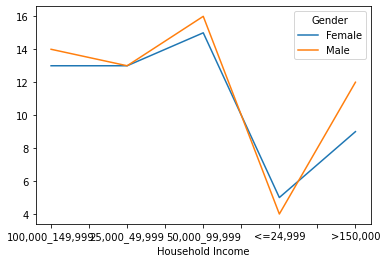

In [315]:

income_per_gender.plot()

([<matplotlib.axis.YTick at 0x7fdc8f9535b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

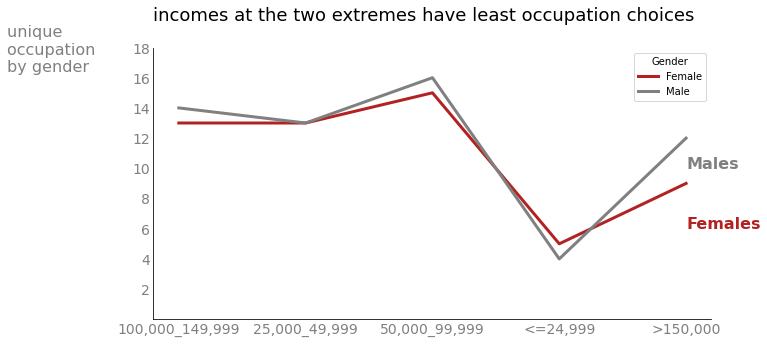

In [305]:
income_median_per_gender.plot(figsize=(10, 5), linewidth=3,
                             color=['firebrick', 'gray']
                            )

plt.xlabel('')
plt.ylabel("unique \noccupation \nby gender",
           rotation=0,
           position=(-2, .9),
           fontsize=16,
           ha='left',
           labelpad=125,
           color='gray'
          )

sns.despine()

# Set y-limits and remove legend
plt.ylim(0, None)
#plt.legend([], frameon=False)

# Title
plt.title("incomes at the two extremes have least occupation choices\n",
          fontsize=18, loc='left'
         )


# Annotations
plt.text(4, 6, "Females", color='firebrick', fontsize=16, fontweight='bold')
plt.text(4, 10, "Males", color='gray', fontsize=16, fontweight='bold')

# Tick labels
ax = plt.gca()
ax.tick_params(axis='both', colors='gray', labelsize=14, length=0)

g = ax.get_yticks()
plt.yticks(g[1:])

